In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

## Data import 및 확인

In [26]:
df = pd.read_csv("five_minute/한국전력거래소_5분단위 전력수급현황_20230430.csv", encoding='cp949', index_col='기준일시', parse_dates=True)
df
# 종속변수는 현재수요(MW)로 설정한다.

,공급능력(MW),현재수요(MW),최대예측수요(MW),공급예비력(MW),공급예비율(퍼센트),운영예비력(MW),운영예비율(퍼센트)
기준일시,,,,,,,
2022-04-01 00:00:00,82494.25,62453.29,70100,20040.96,32.08951,9257.45,14.82300
2022-04-01 00:05:00,83807.25,62329.25,70700,21477.99,34.45893,10889.28,17.47058
2022-04-01 00:10:00,83799.12,61830.96,70700,21968.15,35.52937,10865.86,17.57350
2022-04-01 00:15:00,83790.42,61648.72,70700,22141.69,35.91589,10864.26,17.62284
2022-04-01 00:20:00,83770.82,61382.62,70700,22388.19,36.47318,10451.95,17.02754
...,...,...,...,...,...,...,...
2023-04-30 23:35:00,76101.03,53828.62,57300,22272.40,41.37651,9389.09,17.44257
2023-04-30 23:40:00,76084.24,53693.20,57300,22391.04,41.70181,8897.85,16.57166
2023-04-30 23:45:00,76083.32,52937.98,57300,23145.34,43.72161,9257.95,17.48829


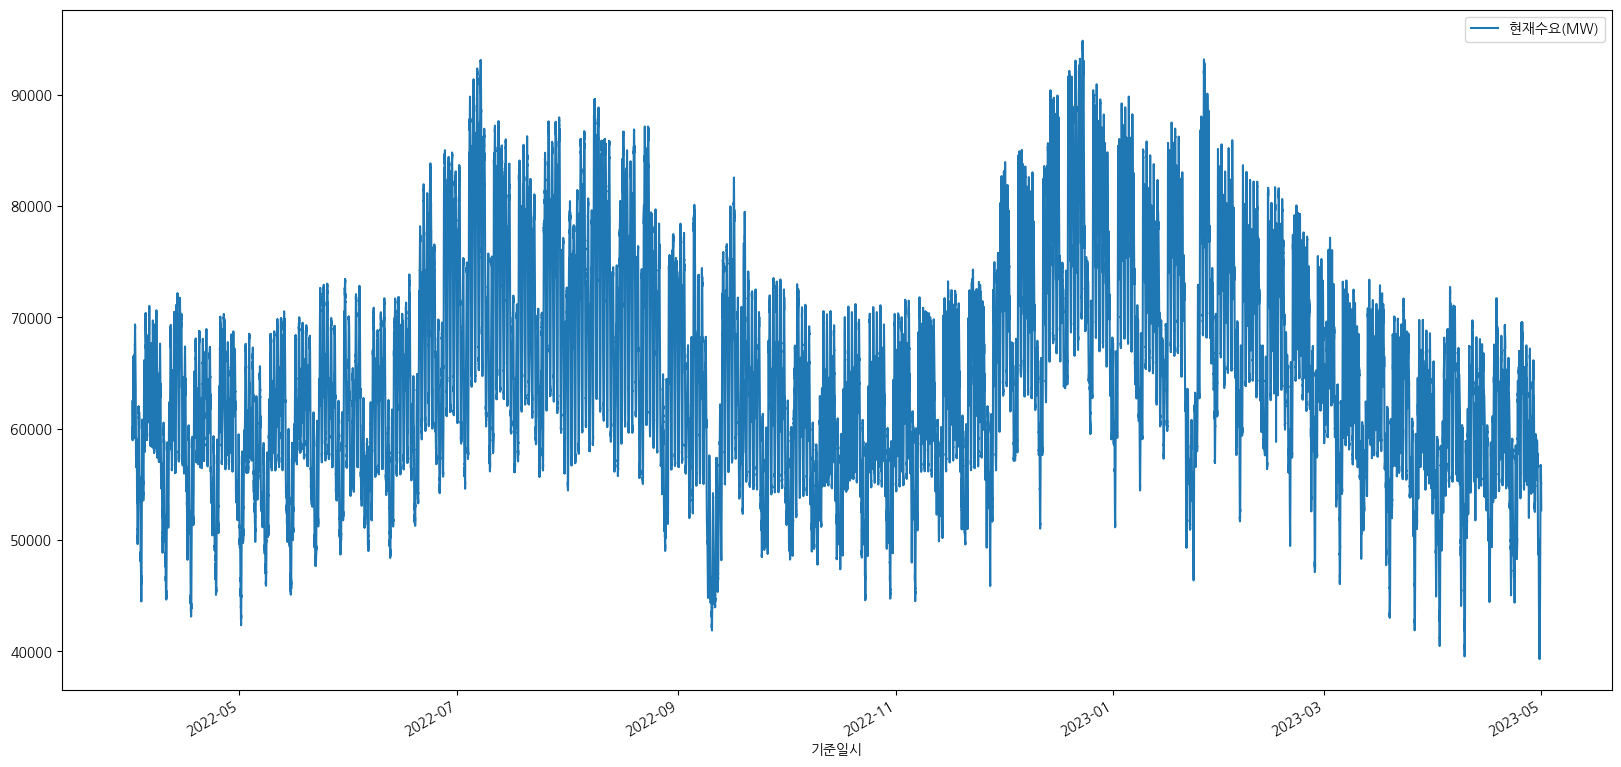

In [27]:
df[['현재수요(MW)']].plot(figsize =(20,10));

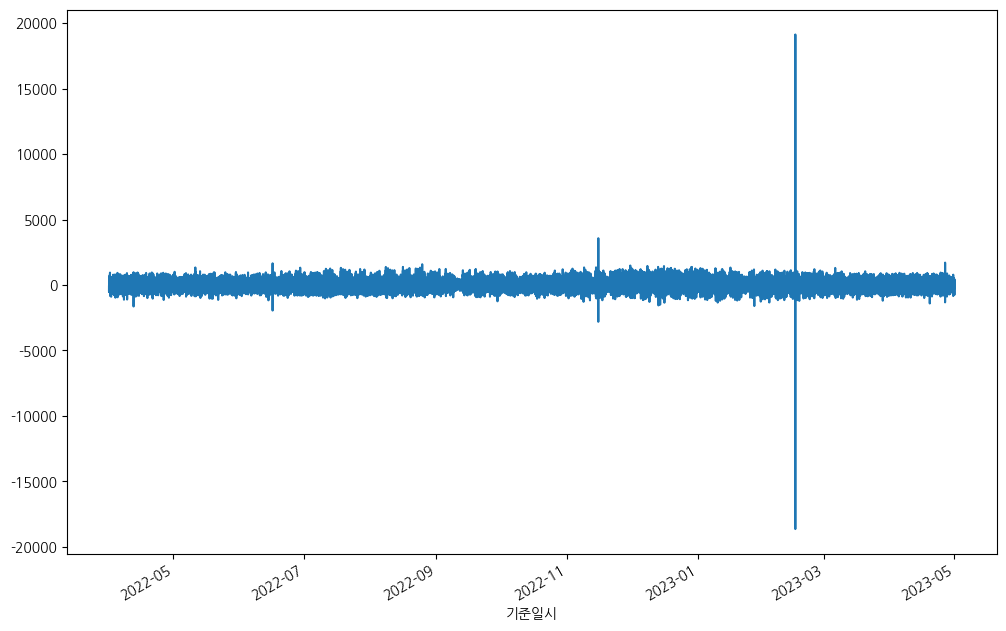

In [29]:
from statsmodels.tsa.statespace.tools import diff
diff(df["현재수요(MW)"], k_diff=1).plot(figsize=(12,8));

# Target data 추출

## train 데이터 추출

In [16]:
# train기간
train = df.loc[:'2023-03-12 23:55:00']

In [17]:
train.to_csv("train.csv")

In [18]:
train

,공급능력(MW),현재수요(MW),최대예측수요(MW),공급예비력(MW),공급예비율(퍼센트),운영예비력(MW),운영예비율(퍼센트)
기준일시,,,,,,,
2022-04-01 00:00:00,82494.25,62453.29,70100,20040.96,32.08951,9257.45,14.82300
2022-04-01 00:05:00,83807.25,62329.25,70700,21477.99,34.45893,10889.28,17.47058
2022-04-01 00:10:00,83799.12,61830.96,70700,21968.15,35.52937,10865.86,17.57350
2022-04-01 00:15:00,83790.42,61648.72,70700,22141.69,35.91589,10864.26,17.62284
2022-04-01 00:20:00,83770.82,61382.62,70700,22388.19,36.47318,10451.95,17.02754
...,...,...,...,...,...,...,...
2023-03-12 23:35:00,84905.65,60235.18,61500,24670.47,40.95692,10984.33,18.23575
2023-03-12 23:40:00,84900.67,60106.61,61500,24794.05,41.25012,10952.83,18.22233
2023-03-12 23:45:00,84895.06,59725.49,61500,25169.56,42.14208,11450.91,19.17256


In [19]:
X_train = train.drop("현재수요(MW)", axis=1)
X_train.to_csv("X_train.csv")
y_train = train['현재수요(MW)']
y_train.to_csv("y_train.csv")


In [20]:
X_train.shape, y_train.shape

((99545, 6), (99545,))

## test 데이터 추출

In [21]:
# test기간
test = df.loc['2023-03-13 00:00:00':'2023-03-19 23:55:00']
test.to_csv("test.csv")

In [22]:
test

,공급능력(MW),현재수요(MW),최대예측수요(MW),공급예비력(MW),공급예비율(퍼센트),운영예비력(MW),운영예비율(퍼센트)
기준일시,,,,,,,
2023-03-13 00:00:00,84908.51,58782.03,72459,26126.48,44.44637,11493.20,19.55223
2023-03-13 00:05:00,85917.51,58954.44,72459,26963.07,45.73543,11608.36,19.69040
2023-03-13 00:10:00,86266.17,58710.58,72459,27555.59,46.93462,11721.43,19.96476
2023-03-13 00:15:00,86280.27,58298.44,72459,27981.82,47.99755,11486.17,19.70237
2023-03-13 00:20:00,86249.03,58263.70,72459,27985.33,48.03218,11020.61,18.91506
...,...,...,...,...,...,...,...
2023-03-19 23:35:00,83627.65,58627.16,60700,25000.48,42.64317,10477.01,17.87057
2023-03-19 23:40:00,83621.96,57941.24,60700,25680.72,44.32200,10712.65,18.48882
2023-03-19 23:45:00,83618.93,57726.21,60700,25892.72,44.85435,10759.25,18.63841


In [23]:
X_test = test.drop("현재수요(MW)", axis=1)
X_test.to_csv("X_test.csv")

In [24]:
y = test['현재수요(MW)']
y.to_csv("y.csv")


In [25]:
X_test.shape, y.shape

((2016, 6), (2016,))

## train, test 분포 비교

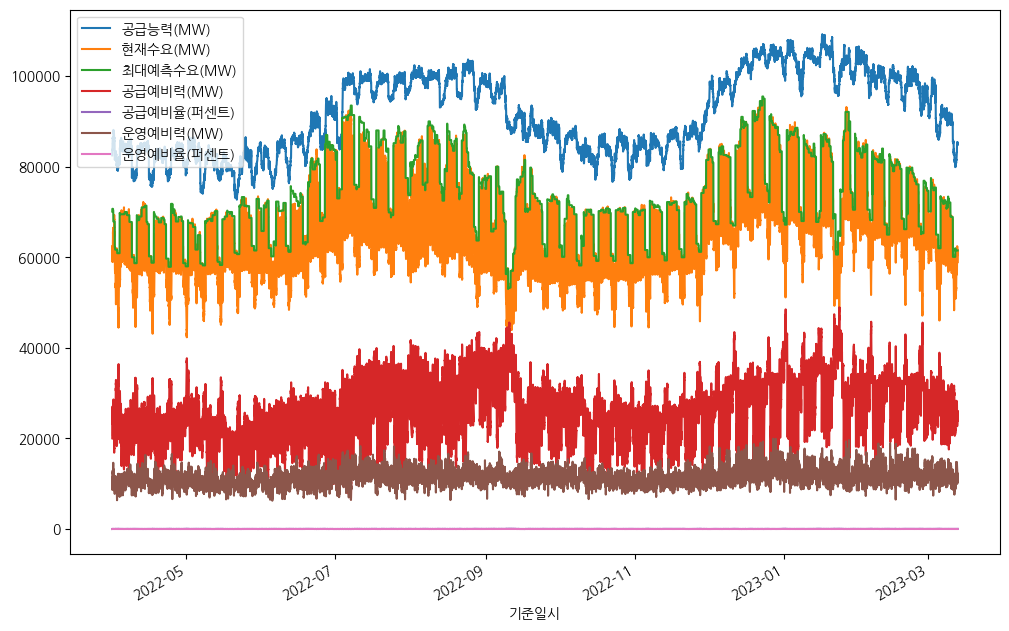

In [16]:
train.plot(figsize = (12,8));

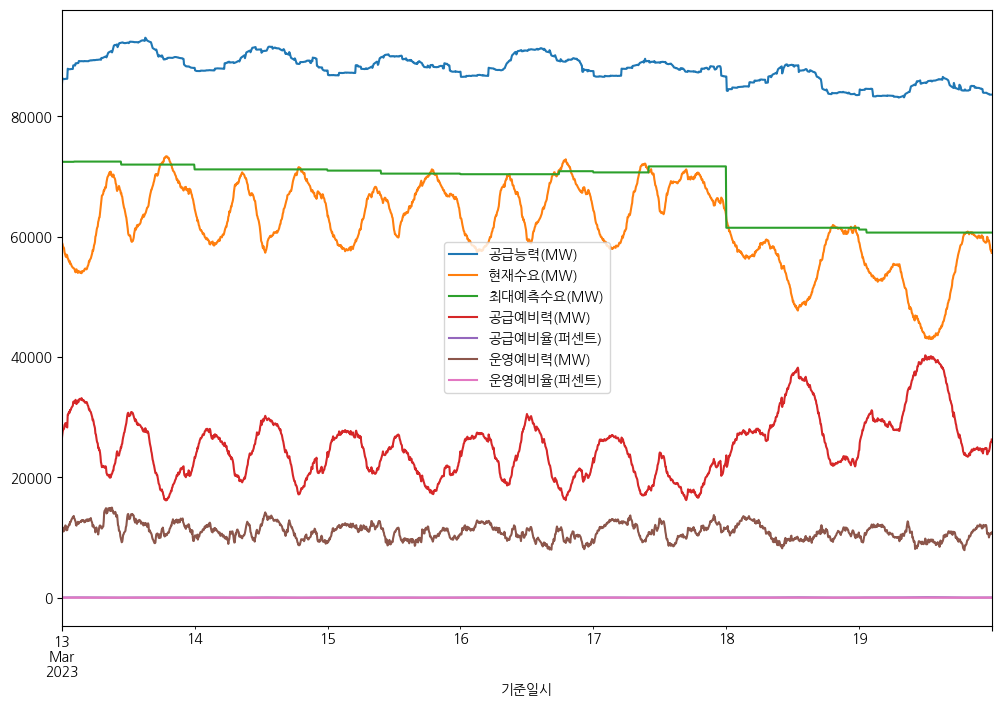

In [17]:
test.plot(figsize = (12,8));

# Ensemble

## RandomForest

In [2]:
# 기상데이터 import
df_final = pd.read_csv("meteorological/df_final.csv", index_col=0, parse_dates=True) # 기상데이터 total 최종본
df_final.index.freq = '5T'
train = pd.read_csv("meteorological/train.csv", index_col=0, parse_dates=True) # 2022-04-01 00:00:00 ~ 2023-03-12 23:55:00 까지의 데이터
train.index.freq = '5T'
X_train = pd.read_csv("meteorological/X_train.csv", index_col=0, parse_dates=True)
X_train.index.freq='5T'
y_train = pd.read_csv("meteorological/y_train.csv", index_col=0, parse_dates=True)
y_train.index.freq='5T'
test = pd.read_csv("meteorological/test.csv", index_col=0, parse_dates=True) # 2023-03-13 00:00:00':'2023-03-19 23:55:00' 까지의 데이터
test.index.freq = '5T'
X_test = pd.read_csv("meteorological/X_test.csv", index_col=0, parse_dates=True)
X_test.index.freq = '5T'
y = pd.read_csv("meteorological/y.csv", index_col=0, parse_dates=True)
y.index.freq = '5T'

In [2]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import train_test_split

In [4]:
def get_score_splited_train(model, xtrain, xtest, ytrain, ytest):
    A = model.score(xtrain, ytrain)
    B = model.score(xtest,ytest)
    pred = model.predict(xtest)
    C = mape(ytest, pred)

    print(f"ACC train : {A:.4f}, test : {B:.4f}, mape : {C:.4f}" )

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(X_train, y_train)

In [6]:
# rf_model = RandomForestRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42, bootstrap=True, max_depth=None, min_samples_leaf=1,
                                    min_samples_split=2, n_estimators=200)
rf_model.fit(xtrain,ytrain)

C:\Users\ppjjh\AppData\Local\Temp\ipykernel_21084\847808836.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(xtrain,ytrain)


RandomForestRegressor(n_estimators=200, random_state=42)

In [7]:
get_score_splited_train(rf_model, xtrain, xtest, ytrain, ytest)

ACC train : 0.9985, test : 0.9899, mape : 0.0078


In [8]:
banyla_rf = rf_model.predict(X_test)

In [9]:
mape(y, banyla_rf)

0.10450620884355982

In [10]:
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = xtrain.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)


          importance
이슬점온도       0.261921
기온          0.196687
기압          0.113099
일조량         0.101057
지면온도        0.100749
시정(가시거리)    0.075348
풍속          0.066455
상대습도        0.049534
강수량         0.035150


- 그러나 모든 지표가 후행성 지표이므로 분석 대상의 Feature가 아니기에 해당 결과를 신뢰할 수 없음.

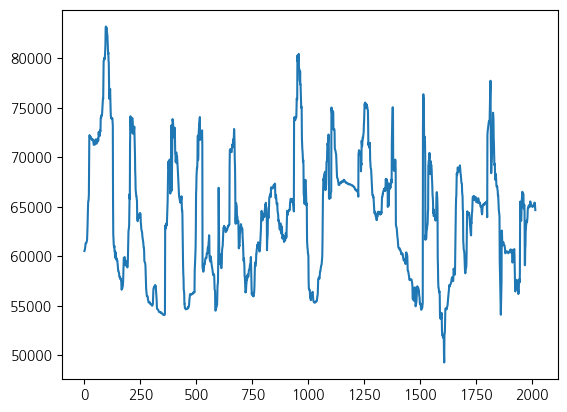

In [11]:
pd.Series(banyla_rf).plot();

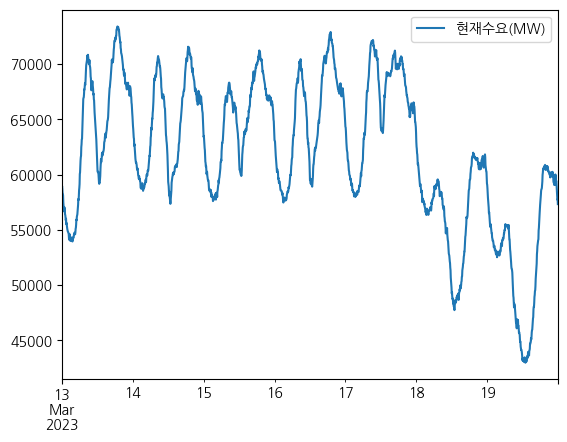

In [12]:
y.plot();

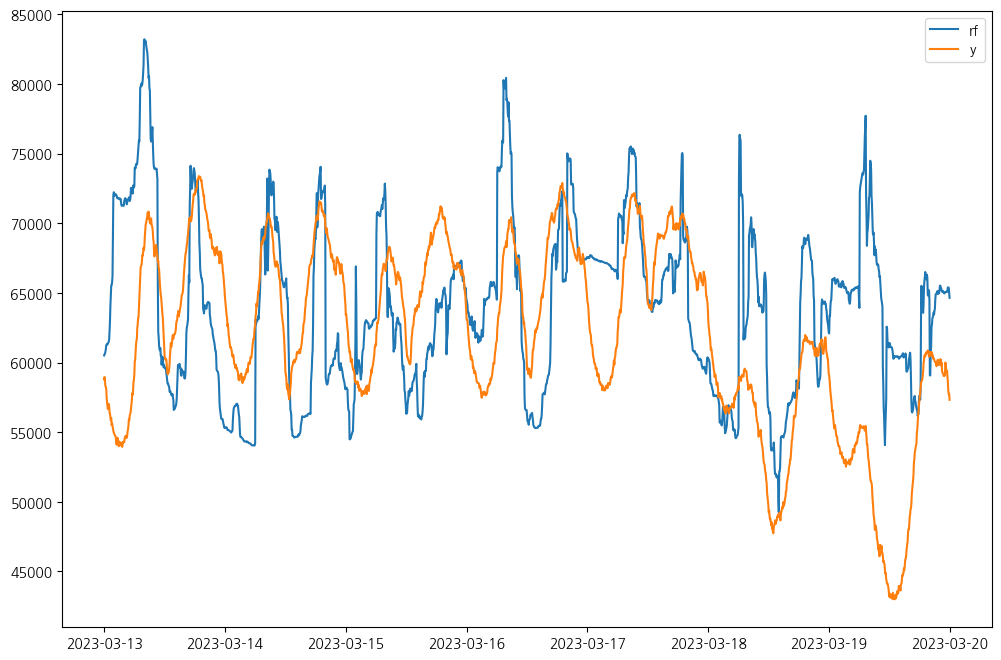

In [26]:
prediction = pd.Series(banyla_rf)
prediction.index = y.index
prediction
plt.figure(figsize=(12,8))
plt.plot(prediction, label = 'rf')
plt.plot(y, label = 'y')
# plt.xlabel(y.index)
plt.legend()
plt.show()

## Time Series 변수 삽입

In [27]:
# Time Series 분석에 따른 target time 변수
target_time = [25,68,156,288,576]

In [28]:
target_list = list(X_train.columns)
target_list

['이슬점온도', '기온', '상대습도', '강수량', '일조량', '지면온도', '풍속', '기압', '시정(가시거리)']

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [31]:
TES_X_train = X_train.copy()
TES_X_test = X_test.copy()

In [32]:
# 0 값의 오류로 인한 로그변환
for col in target_list:
    TES_X_train[col] = scaler.fit_transform(TES_X_train[[col]])
    TES_X_test[col] = scaler.fit_transform(TES_X_test[[col]])

In [33]:
TES_X_train.head()

,이슬점온도,기온,상대습도,강수량,일조량,지면온도,풍속,기압,시정(가시거리)
2022-04-01 00:00:00,0.532656,0.446062,0.787763,0.098366,0.0,0.234426,0.254189,0.778943,0.494186
2022-04-01 00:05:00,0.532208,0.445197,0.789166,0.093699,0.0,0.233747,0.252967,0.779529,0.494890
2022-04-01 00:10:00,0.531761,0.444332,0.790568,0.089032,0.0,0.233067,0.251745,0.780115,0.495595
2022-04-01 00:15:00,0.531314,0.443467,0.791971,0.084365,0.0,0.232388,0.250524,0.780700,0.496299
2022-04-01 00:20:00,0.530867,0.442602,0.793374,0.079698,0.0,0.231708,0.249302,0.781286,0.497004


In [34]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from tqdm import tqdm
def make_TES_se_add(target_time, col, TES_X_train, TES_X_test):
    for i in tqdm(target_time):
        model_add = ExponentialSmoothing(TES_X_train[col], trend='add', seasonal='add', seasonal_periods=i).fit()
        TES_X_train[f'TESadd_add{i}{col}'] = model_add.fittedvalues
        model_add = ExponentialSmoothing(TES_X_test[col], trend='add', seasonal='add', seasonal_periods=i).fit()
        TES_X_test[f'TESadd_add{i}{col}'] = model_add.fittedvalues

#
#     for i in tqdm(target_time):
#         model_add = ExponentialSmoothing(TES_X_train[col], trend='mul', seasonal='add', seasonal_periods=i).fit()
#         TES_X_train[f'TESmul_add{i}{col}'] = model_add.fittedvalues
#         model_add = ExponentialSmoothing(TES_X_test[col], trend='mul', seasonal='add', seasonal_periods=i).fit()
#         TES_X_test[f'TESmul_add{i}{col}'] = model_add.fittedvalues
    return TES_X_train, TES_X_test
#
# # TES_X_train.tail()

In [35]:
for col in target_list:
    TES_X_train, TES_X_test = make_TES_se_add(target_time, col, TES_X_train, TES_X_test)

 40%|████      | 2/5 [00:18<00:29,  9.70s/it]C:\Users\ppjjh\anaconda3\envs\park\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
 60%|██████    | 3/5 [00:40<00:29, 14.92s/it]C:\Users\ppjjh\anaconda3\envs\park\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
 80%|████████  | 4/5 [01:11<00:21, 21.27s/it]C:\Users\ppjjh\anaconda3\envs\park\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
 40%|████      | 2/5 [00:20<00:30, 10.27s/it]C:\Users\ppjjh\anaconda3\envs\park\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
 60%|██████    | 3/5 [00:40<00:30, 15.12s/it]C:\Users\ppjjh\anaconda3\envs\park\lib\

In [36]:
TES_X_train.tail()

,이슬점온도,기온,상대습도,강수량,일조량,지면온도,풍속,기압,시정(가시거리),TESadd_add25이슬점온도,...,TESadd_add25기압,TESadd_add68기압,TESadd_add156기압,TESadd_add288기압,TESadd_add576기압,TESadd_add25시정(가시거리),TESadd_add68시정(가시거리),TESadd_add156시정(가시거리),TESadd_add288시정(가시거리),TESadd_add576시정(가시거리)
2023-03-12 23:35:00,0.281735,0.351204,0.307931,0.01981,0.0,0.148395,0.805707,0.683590,0.906215,0.281744,...,0.683562,0.683591,0.683566,0.683616,0.683596,0.906160,0.906321,0.906030,0.906234,0.906239
2023-03-12 23:40:00,0.280038,0.350277,0.305997,0.02264,0.0,0.147721,0.803400,0.683832,0.908352,0.280038,...,0.683830,0.683850,0.683815,0.683853,0.683846,0.908424,0.908458,0.908076,0.908376,0.908375
2023-03-12 23:45:00,0.278341,0.349351,0.304064,0.02547,0.0,0.147048,0.801093,0.684075,0.910489,0.278334,...,0.684092,0.684097,0.684041,0.684073,0.684095,0.910603,0.910625,0.910187,0.910511,0.910504
2023-03-12 23:50:00,0.276643,0.348424,0.302130,0.02830,0.0,0.146374,0.798786,0.684318,0.912627,0.276641,...,0.684330,0.684342,0.684305,0.684289,0.684336,0.912638,0.912724,0.912370,0.912639,0.912626
2023-03-12 23:55:00,0.274946,0.347497,0.300197,0.03113,0.0,0.145701,0.796479,0.684560,0.914764,0.274939,...,0.684563,0.684579,0.684562,0.684509,0.684569,0.914721,0.914842,0.914574,0.914772,0.914752


In [37]:
TES_X_test.tail()

,이슬점온도,기온,상대습도,강수량,일조량,지면온도,풍속,기압,시정(가시거리),TESadd_add25이슬점온도,...,TESadd_add25기압,TESadd_add68기압,TESadd_add156기압,TESadd_add288기압,TESadd_add576기압,TESadd_add25시정(가시거리),TESadd_add68시정(가시거리),TESadd_add156시정(가시거리),TESadd_add288시정(가시거리),TESadd_add576시정(가시거리)
2023-03-19 23:35:00,0.628224,0.305605,0.785088,0.0,0.0,0.172388,0.000789,0.154943,0.006747,0.628308,...,0.154706,0.155024,0.154962,0.155022,0.154982,0.007024,0.006861,0.006505,0.006990,0.006711
2023-03-19 23:40:00,0.627517,0.301515,0.789557,0.0,0.0,0.170638,0.000592,0.153659,0.005060,0.627430,...,0.153583,0.153745,0.153658,0.153746,0.153526,0.005397,0.005176,0.004856,0.005301,0.004996
2023-03-19 23:45:00,0.626809,0.297424,0.794025,0.0,0.0,0.168888,0.000395,0.152375,0.003373,0.626702,...,0.152364,0.152345,0.152365,0.152441,0.152275,0.003324,0.003443,0.003195,0.003617,0.003312
2023-03-19 23:50:00,0.626101,0.293333,0.798493,0.0,0.0,0.167138,0.000197,0.151090,0.001687,0.625895,...,0.151086,0.151088,0.151098,0.151131,0.151058,0.001478,0.001656,0.001562,0.001995,0.001650
2023-03-19 23:55:00,0.625393,0.289243,0.802961,0.0,0.0,0.165388,0.000000,0.149806,0.000000,0.625212,...,0.149765,0.149837,0.149837,0.149830,0.149757,0.000166,-0.000006,-0.000047,0.000243,-0.000042


In [72]:
# 모든 데이터 학습
import pickle
def run_model(TES_X_train, TES_X_test, y_train, y):
    best_rf = RandomForestRegressor(random_state=42, bootstrap=True, max_depth=None, min_samples_leaf= 1, min_samples_split=2, n_estimators=200)
    best_rf.fit(TES_X_train,y_train)
    prediction = best_rf.predict(TES_X_test)
    print(f"mape : {mape(y, prediction):.4f}")
    feature_importances = pd.DataFrame(best_rf.feature_importances_,
                                       index = TES_X_test.columns,
                                       columns=['importance']).sort_values('importance', ascending=False)
    print(feature_importances)

    prediction = pd.Series(prediction)
    prediction.index = y.index
    prediction
    plt.figure(figsize=(12,8))
    plt.plot(prediction, label = 'rf')
    plt.plot(y, label = 'y')
    # plt.xlabel(y.index)
    plt.legend()
    plt.show()
    with open('meteorological/model/rf/find_feature_rf_model.pkl', 'wb') as file:
        pickle.dump(best_rf, file)
    return feature_importances

In [42]:
print(feature_importances)

                       importance
이슬점온도                    0.118511
기온                       0.062177
TESadd_add68기온           0.047253
TESadd_add288일조량         0.045065
TESadd_add576이슬점온도       0.040480
TESadd_add288이슬점온도       0.033136
TESadd_add156기온          0.026155
TESadd_add68일조량          0.024150
TESadd_add576일조량         0.022891
TESadd_add288기온          0.022187
TESadd_add68이슬점온도        0.021677
기압                       0.021607
TESadd_add25기온           0.020247
TESadd_add156이슬점온도       0.020033
지면온도                     0.018956
TESadd_add25일조량          0.018842
풍속                       0.018672
TESadd_add156기압          0.018148
TESadd_add25이슬점온도        0.018118
TESadd_add156지면온도        0.017918
TESadd_add288기압          0.017738
TESadd_add576기압          0.017567
TESadd_add25지면온도         0.016896
시정(가시거리)                 0.016668
TESadd_add68기압           0.016182
TESadd_add156일조량         0.015915
TESadd_add25기압           0.015407
TESadd_add288지면온도        0.014616
TESadd_add576지

In [62]:
target_col = ['이슬점온도', '기온','기압','지면온도','풍속','시정(가시거리)','일조량','상대습도','강수량']

C:\Users\ppjjh\AppData\Local\Temp\ipykernel_21084\445260239.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rf.fit(TES_X_train,y_train)


mape : 0.1068
                    importance
TESadd_add288일조량      0.234844
이슬점온도                 0.206904
기온                    0.137044
TESadd_add576이슬점온도    0.112642
TESadd_add68기온        0.111640
TESadd_add288이슬점온도    0.107405
TESadd_add156기온       0.089521


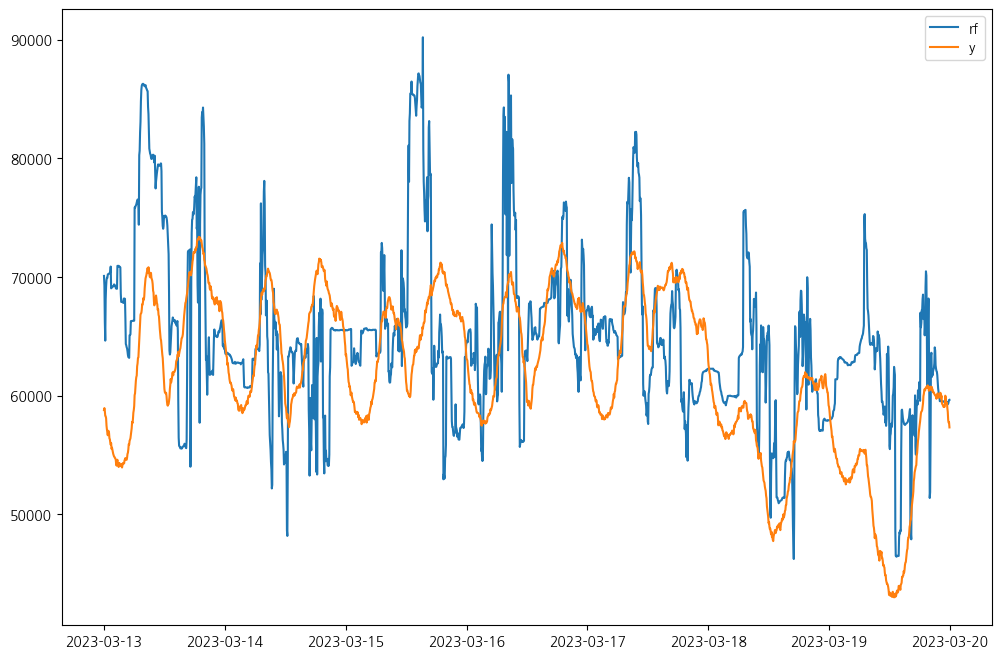

In [73]:
feature_importances = run_model(TES_X_train[data[:7].index], TES_X_test[data[:7].index],y_train, y)

In [49]:
# print(feature_importances)
print(data)

                       importance
이슬점온도                    0.118511
기온                       0.062177
TESadd_add68기온           0.047253
TESadd_add288일조량         0.045065
TESadd_add576이슬점온도       0.040480
TESadd_add288이슬점온도       0.033136
TESadd_add156기온          0.026155
TESadd_add68일조량          0.024150
TESadd_add576일조량         0.022891
TESadd_add288기온          0.022187
TESadd_add68이슬점온도        0.021677
기압                       0.021607
TESadd_add25기온           0.020247
TESadd_add156이슬점온도       0.020033
지면온도                     0.018956
TESadd_add25일조량          0.018842
풍속                       0.018672
TESadd_add156기압          0.018148
TESadd_add25이슬점온도        0.018118
TESadd_add156지면온도        0.017918
TESadd_add288기압          0.017738
TESadd_add576기압          0.017567
TESadd_add25지면온도         0.016896
시정(가시거리)                 0.016668
TESadd_add68기압           0.016182
TESadd_add156일조량         0.015915
TESadd_add25기압           0.015407
TESadd_add288지면온도        0.014616
TESadd_add576지

In [64]:
data[:20].index

Index(['이슬점온도', '기온', 'TESadd_add68기온', 'TESadd_add288일조량',
       'TESadd_add576이슬점온도', 'TESadd_add288이슬점온도', 'TESadd_add156기온',
       'TESadd_add68일조량', 'TESadd_add576일조량', 'TESadd_add288기온',
       'TESadd_add68이슬점온도', '기압', 'TESadd_add25기온', 'TESadd_add156이슬점온도',
       '지면온도', 'TESadd_add25일조량', '풍속', 'TESadd_add156기압', 'TESadd_add25이슬점온도',
       'TESadd_add156지면온도'],
      dtype='object')

In [75]:
from sklearn.feature_selection import RFECV

In [76]:
# 단계선택법



def rfecv_run_model(TES_X_train, TES_X_test, y_train, y):
    best_rf = RandomForestRegressor(random_state=42)
    rfecv = RFECV(estimator=best_rf)

    rfecv.fit(TES_X_train, np.ravel(y_train))
    prediction = rfecv.predict(TES_X_test)
    print(f"mape : {mape(y, prediction):.4f}")
    # feature_importances = pd.DataFrame(rfecv.feature_,
    #                                    index=TES_X_test.columns,
    #                                    columns=['importance']).sort_values('importance', ascending=False)
    # print(feature_importances)

    # prediction = pd.Series(prediction)
    # prediction.index = y.index
    # prediction
    # plt.figure(figsize=(12, 8))
    # plt.plot(prediction, label='rf')
    # plt.plot(y, label='y')
    # plt.xlabel(y.index)
    # plt.legend()
    # plt.show()
    with open('meteorological/model/rf/selected_features_rfecv_model.pkl', 'wb') as file:
        pickle.dump(rfecv, file)
    return rfecv

In [ ]:
feature_importances = rfecv_run_model(TES_X_train, TES_X_test,y_train, y)